# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

filenames = ["lenaRGB.png", "lenaRGBSzum.png"]
for filename in filenames:
  if not os.path.exists(filename):
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

In [2]:
def show_images_row(images, titles=None):
  if not titles:
    titles = []
  titles_filler = [None for _ in range(len(images) - len(titles))]
  titles.extend(titles_filler)

  _, axs = plt.subplots(1, len(images))

  for image, title, ax in zip(images, titles, axs):
    if title:
      ax.set_title(title)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(image)

  plt.show()


def show_images_prepost(image, image_filtered):
  show_images_row(
    [image, image_filtered],
    ["Original image", "Filtered image"])

In [3]:
def filter_median_rgb(image, kernel_size=3):
  h, w, _        = image.shape
  d              = kernel_size // 2
  image_filtered = image.copy()

  for i in range(d, h - d):
    for j in range(d, w - d):
      window = image[i - d:i + d + 1, j - d:j + d + 1, :].astype(np.float64)
      distances = np.empty((kernel_size, kernel_size), dtype=np.float64)
      for i0 in range(kernel_size):
        for j0 in range(kernel_size):
          distances[i0, j0] = np.sqrt(np.square(window - window[i0, j0])).sum()

      di, dj = np.unravel_index(np.argmin(distances), (kernel_size, kernel_size))
      image_filtered[i, j] = image[i + di - d, j + dj - d, :]

  return image_filtered

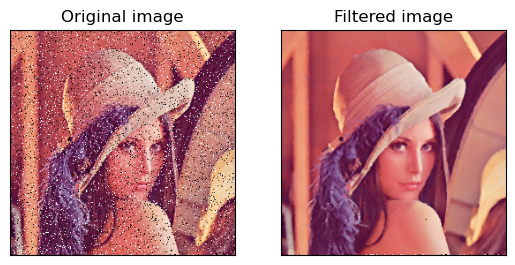

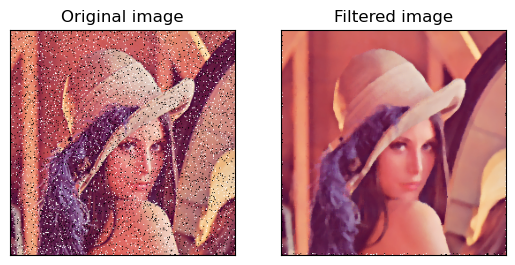

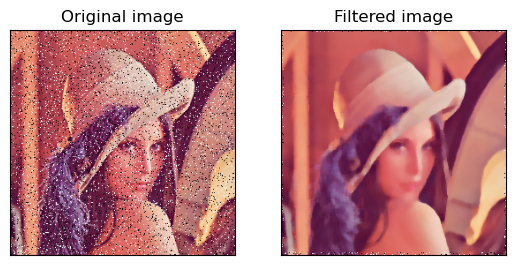

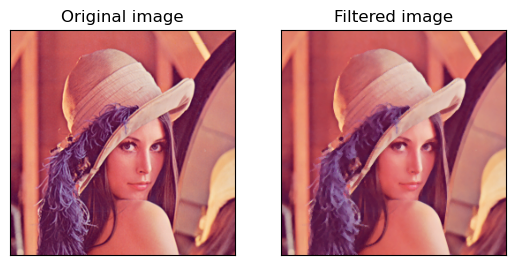

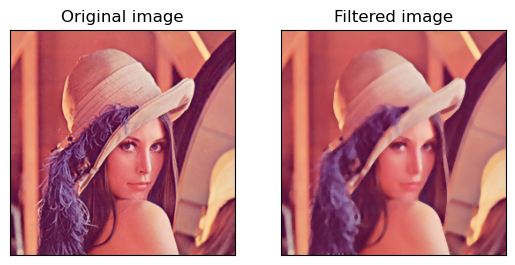

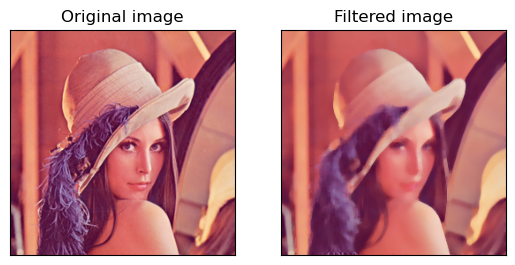

In [4]:
for kernel_size in [3, 5, 7]:
  filename       = "lenaRGBSzum.png"
  image          = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  image_filtered = filter_median_rgb(image, kernel_size)
  show_images_prepost(image, image_filtered)

for kernel_size in [3, 5, 7]:
  filename       = "lenaRGB.png"
  image          = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  image_filtered = filter_median_rgb(image, kernel_size)
  show_images_prepost(image, image_filtered)